# DAT 301 - Assignment 5: CNN (5 of 5)
- Name: Colin Bowers (bowerc3)
- Date: Mar 20, 2024

## Final Optimized Model
The best parameters and configuration for the CNN model were chosen from previous experiments and combined into a single model.  
1. Adding a 3rd convolutional layer
2. Using 64 filters


# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2024-03-11 12:32:12.855960: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 12:32:13.499330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 12:32:13.509299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 12:32:13.543005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 12:32:13.897682: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 12:32:13.906042: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Create the convolutional base

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
# first layer
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

# second layer
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

# third layer
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))


### Add dense layers

In [7]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Model Summary

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

## Part 3 - Training the CNN

### Compiling the CNN

In [9]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [10]:
%%time
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


2024-03-11 12:32:26.185778: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31490048 exceeds 10% of free system memory.
2024-03-11 12:32:26.646003: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 7872512 exceeds 10% of free system memory.
2024-03-11 12:32:26.651805: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6889472 exceeds 10% of free system memory.
2024-03-11 12:32:26.835093: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20238336 exceeds 10% of free system memory.
2024-03-11 12:32:26.835279: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20238336 exceeds 10% of free system memory.


250/250 [==============================] - 61s 236ms/step - loss: 0.6902 - accuracy: 0.5324 - val_loss: 0.6678 - val_accuracy: 0.6005
Epoch 2/25
250/250 [==============================] - 56s 223ms/step - loss: 0.6352 - accuracy: 0.6371 - val_loss: 0.5875 - val_accuracy: 0.6930
Epoch 3/25
250/250 [==============================] - 54s 217ms/step - loss: 0.5682 - accuracy: 0.7075 - val_loss: 0.5596 - val_accuracy: 0.7120
Epoch 4/25
250/250 [==============================] - 58s 231ms/step - loss: 0.5395 - accuracy: 0.7264 - val_loss: 0.5674 - val_accuracy: 0.7230
Epoch 5/25
250/250 [==============================] - 50s 199ms/step - loss: 0.5139 - accuracy: 0.7375 - val_loss: 0.5160 - val_accuracy: 0.7535
Epoch 6/25
250/250 [==============================] - 53s 213ms/step - loss: 0.4873 - accuracy: 0.7632 - val_loss: 0.4721 - val_accuracy: 0.7700
Epoch 7/25
250/250 [==============================] - 59s 236ms/step - loss: 0.4680 - accuracy: 0.7747 - val_loss: 0.4534 - val_accuracy: 0.7

### Evaluate the Model

63/63 - 6s - loss: 0.4023 - accuracy: 0.8435 - 6s/epoch - 98ms/step


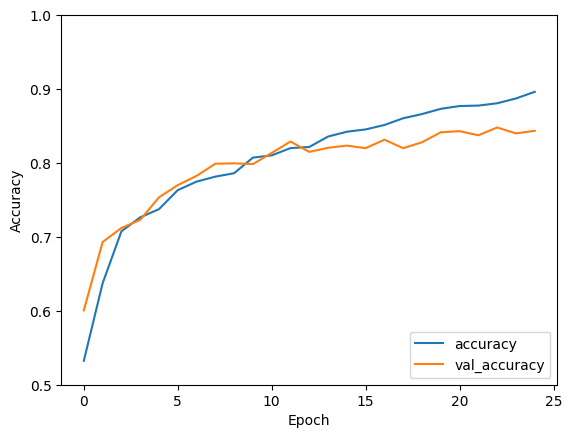

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_set, verbose=2)

In [12]:
print(f"Accuracy: {test_acc}")
print(f"    Loss: {test_loss}")

Accuracy: 0.843500018119812
    Loss: 0.4022901952266693


In [13]:
original_acc = 0.7954999804496765
delta_acc = test_acc - original_acc
print(f"Increase in Accuracy: {delta_acc}")

Increase in Accuracy: 0.0480000376701355


In [14]:
print("SUMMARY")
print(f"Accuracy (%): {round(test_acc*100, 3)}")
print(f"Increase (%): {round(delta_acc*100, 3)}")

SUMMARY
Accuracy (%): 84.35
Increase (%): 4.8
